# The Python Data Stack

The Python Data Stack comprises a set of packages that make Python a powerful data science language. These include:

+ Numpy: provides arrays and matrix algebra
+ Scipy: provides scientific computing capabilities
+ Matplotlib: provides graphing capabilities

These were the original stack that was meant to replace Matlab. However, these were meant to tackle purely numerical data, and the kinds of heterogeneous data we regularly face needed more tools. These were added more recently.

+ Pandas: provides data analytic structures like the data frame, as well as basic descriptive statistical capabilities
+ statsmodels: provides a fairly comprehensive set of statistical functions
+ scikit-learn: provides machine learning capabilities

This is the stack we will be using throughout this program. Additionally, we will use the `xgboost` package when we get to boosting

In [8]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import statsmodels as sm
%matplotlib inline

Let's do some data ingestion and manipulation using this stack.

## Data ingestion

In [9]:
iris = pd.read_csv('http://ddlteaching.github.io/FreddieMac/data/iris.csv')

In [10]:
type(iris)

pandas.core.frame.DataFrame

In [11]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [13]:
iris.shape

(150, 5)

In [14]:
iris['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

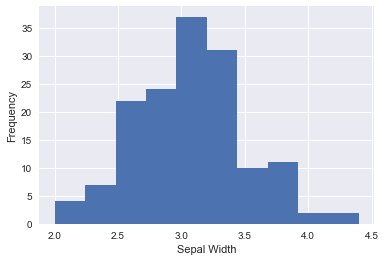

In [15]:
plt.hist(iris['Sepal.Width'])
plt.xlabel('Sepal Width')
plt.ylabel('Frequency');

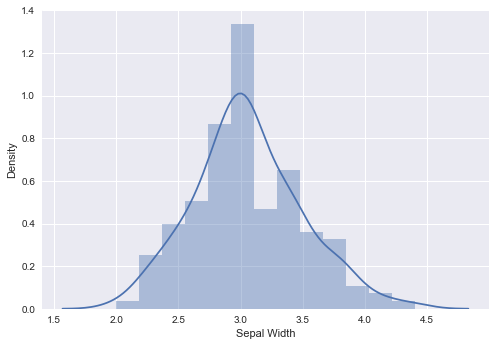

In [17]:
import seaborn as sns
sns.set_context('notebook')
sns.distplot(iris['Sepal.Width'])
plt.xlabel('Sepal Width')
plt.ylabel('Density');

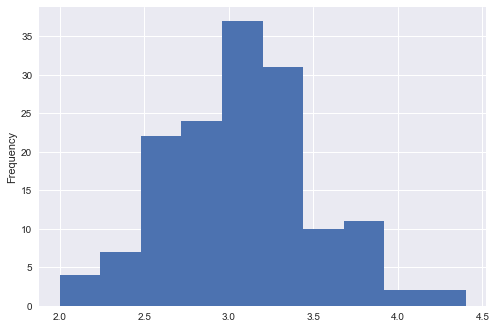

In [18]:
iris['Sepal.Width'].plot(kind = 'hist');

## Data Munging

Pandas also has pretty powerful data munging capabilities

In [40]:
iris.iloc[[1,3,5],:3]

,Sepal.Length,Sepal.Width,Petal.Length
1,4.9,3.0,1.4
3,4.6,3.1,1.5
5,5.4,3.9,1.7


In [41]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [42]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [43]:
iris['Sepal.Length'][0:10]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: Sepal.Length, dtype: float64

In [54]:
iris2 = iris.copy()
iris2.iloc[0,2] = -0.5

In [55]:
iris2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,-0.5,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
iris.loc[:, 'Sepal.Width':'Petal.Width'].head()

,Sepal.Width,Petal.Length,Petal.Width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [60]:
iris[(iris['Sepal.Width'] > 3.0) & (iris['Species']=='setosa')]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa


In [61]:
len(iris)

150

In [62]:
iris.shape

(150, 5)

### Grouped summaries

In [67]:
iris.groupby('Species').

Petal.Length                                               \
                  count   mean       std  min  25%   50%    75%  max   
Species                                                                
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           Petal.Width        ...  Sepal.Length      Sepal.Width         \
                 count   mean ...           75%  max       count   mean   
Species                       ...                                         
setosa            50.0  0.246 ...           5.2  5.8        50.0  3.428   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
Species                                            
setosa      0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

In [85]:
def myrange(x): 
    return(x.max() - x.min())

iris.iloc[:,:-1].agg([np.mean,np.var, myrange])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
mean,5.843333,3.057333,3.758000,1.199333
var,0.685694,0.189979,3.116278,0.581006
myrange,3.600000,2.400000,5.900000,2.400000
